In [148]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.image as mpimg
import pandas as pd 
import os
from scipy.optimize import curve_fit
from statsmodels.nonparametric.kernel_regression import KernelReg
label_size = 14
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

In [149]:
def remove_axis_ticks(AX):
    for AXIS in AX:
        AXIS.set_xticks([])
        AXIS.set_yticks([])

## Figure 1

In [150]:
df1 = pd.read_csv('Results_ROI_nospacer_1-5.csv')
df2 = pd.read_csv('Results_ROI_nospacer_7-10.csv')

Areas = np.array(list(df1.Mean) + list(df2.Mean)) 

ECad_GCEC, ECad_ECEC_lat,ECad_ECEC_api = Areas[0::3],Areas[1::3],Areas[2::3]

/home/kuyyamudi/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  func(*args, **kwargs)
/home/kuyyamudi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


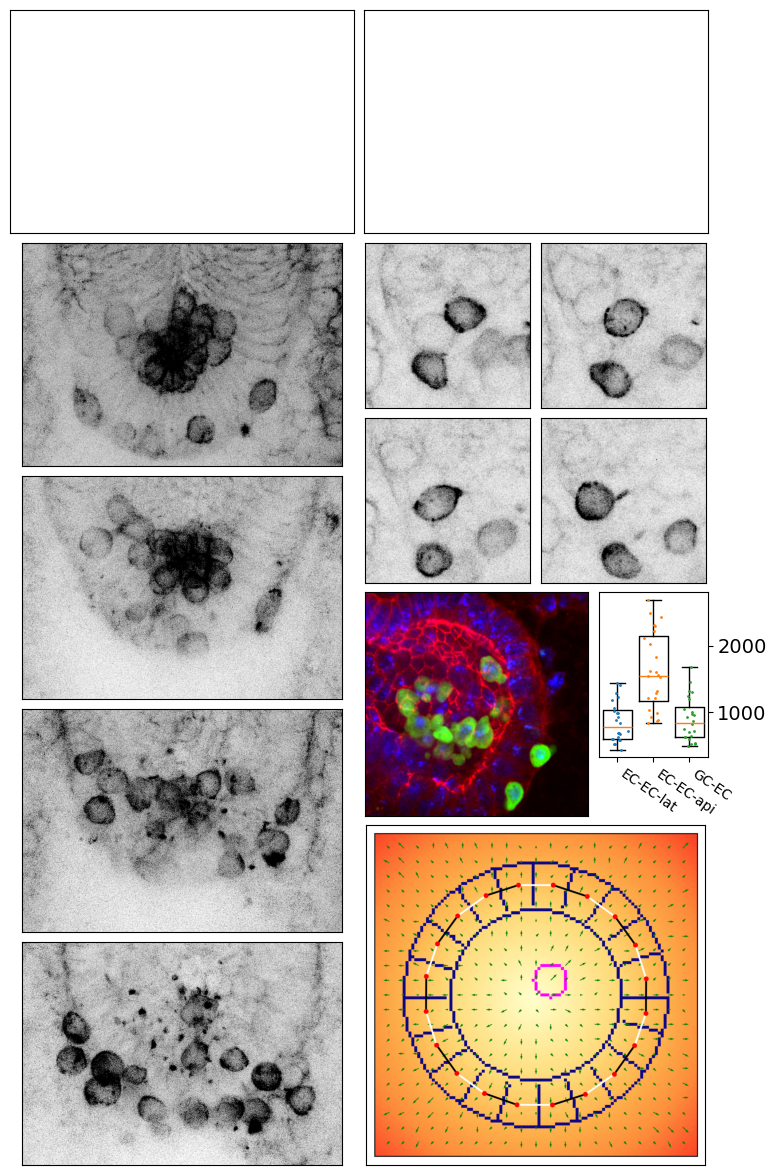

In [151]:
fig1 = plt.figure(constrained_layout=True,figsize=(9,15))
gs = fig1.add_gridspec(20, 12)

w1 = 6
ax1a = fig1.add_subplot(gs[0:4,0:w1])
ax1b = fig1.add_subplot(gs[0:4,w1:2*w1])


ax2 = fig1.add_subplot(gs[4:8,0:w1])
ax3 = fig1.add_subplot(gs[8:12,0:w1])
ax4 = fig1.add_subplot(gs[12:16,0:w1])
ax5 = fig1.add_subplot(gs[16:20,0:w1])

    


ax6 = fig1.add_subplot(gs[4:7,6:9])
ax7 = fig1.add_subplot(gs[4:7,9:12])
ax8 = fig1.add_subplot(gs[7:10,6:9])
ax9 = fig1.add_subplot(gs[7:10,9:12])


ax10 = fig1.add_subplot(gs[10:14,6:10])
ax11 = fig1.add_subplot(gs[10:13,10:12])
ax11.yaxis.tick_right()

ax12 = fig1.add_subplot(gs[14:20,6:12])

remove_axis_ticks([ax1a,ax1b,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax12])

#---------------------------------------------------------------------#
gc_im1 = mpimg.imread("MAX_TEM_compiled-1.png")
gc_im2 = mpimg.imread("MAX_TEM_compiled-2.png")
gc_im3 = mpimg.imread("MAX_TEM_compiled-3.png")
gc_im4 = mpimg.imread("MAX_TEM_compiled-4.png")

ax2.imshow(gc_im1)
ax3.imshow(gc_im2)
ax4.imshow(gc_im3)
ax5.imshow(gc_im4)



sc_im1 = mpimg.imread('MAX_TL_TEM_dorsal_singlecell-1-0001.png')
sc_im2 = mpimg.imread('MAX_TL_TEM_dorsal_singlecell-1-0002.png')
sc_im3 = mpimg.imread('MAX_TL_TEM_dorsal_singlecell-1-0003.png')
sc_im4 = mpimg.imread('MAX_TL_TEM_dorsal_singlecell-1-0004.png')

ax6.imshow(sc_im1)
ax7.imshow(sc_im2)
ax8.imshow(sc_im3)
ax9.imshow(sc_im4)


mg_im = mpimg.imread('RI_1_colour.png')
ax10.imshow(mg_im) 

ax11.boxplot([ECad_ECEC_lat,ECad_ECEC_api,ECad_GCEC],widths=[0.8,0.8,0.8])
x_lat = np.random.normal(1,0.1,len(ECad_ECEC_lat))
x_api = np.random.normal(2,0.1,len(ECad_ECEC_api))
x_gc = np.random.normal(3,0.1,len(ECad_GCEC))
ax11.plot(x_lat,ECad_ECEC_lat,'.',markersize=2)
ax11.plot(x_api,ECad_ECEC_api,'.',markersize=2)
ax11.plot(x_gc,ECad_GCEC,'.',markersize=2)

ax11.set_xticks([1,2,3])

ax11.set_xticklabels(['EC-EC-lat','EC-EC-api','GC-EC'],fontsize=10,rotation=-35, ha='left')


mod_im = mpimg.imread('GC_TEM_Model_Fig1.png')

ax12.imshow(mod_im)


#plt.savefig('GC_TEM_Figure_1.png',bbox_inches='tight',dpi=300)

In [ ]:
#make exit figures 4:6

## Figure 2

In [106]:
D1 = np.load('/home/kuyyamudi/Research/GC_TEM/Output/GC_TEM_4b_AdFlex_Exit_Array.npy')
D2 = np.load('/home/kuyyamudi/Research/GC_TEM/Output/GC_TEM_4c_AdFlex_Exit_Array.npy')
print(D1.shape,D2.shape)

(7, 2, 50, 1000) (7, 1, 50, 1000)


In [107]:
G_ECadVals = eval(open('C_G_values.txt','r').read())
LambdaMs = np.array([4000,4500,5000,5500,6000,6500,7000])

In [108]:
W1 = np.load('/home/kuyyamudi/Research/GC_TEM/Output/GC_TEM_4b_AdFlex_Dwell_Time.npy')
W2 = np.load('/home/kuyyamudi/Research/GC_TEM/Output/GC_TEM_4c_AdFlex_Dwell_Time.npy')
print(W1.shape,W2.shape)

W_lambda = np.zeros((7,3,50,1000))
W_lambda[:,0:2,:,:] = W1
W_lambda[:,2:3,:,:] = W2 * 10

(7, 2, 50, 1000) (7, 1, 50, 1000)


In [109]:
D_lambda = np.zeros((7,3,50,1000))
D_lambda[:,0:2,:,:] = D1
D_lambda[:,2:3,:,:] = D2 * 10

In [110]:
P_Success_lambda = np.zeros(D_lambda.shape[:-1])
G_E = np.linspace(G_ECadVals[0],G_ECadVals[-1],100)

P_Success_lambda_fit = np.zeros((D_lambda.shape[0],D_lambda.shape[1],G_E.size))

Optimal_CG = np.zeros(D_lambda.shape[:-2])

for i in range(P_Success_lambda.shape[0]):
    for j in range(P_Success_lambda.shape[1]):
        for k in range(P_Success_lambda.shape[2]):
            Y = D_lambda[i,j,k,:] 
            denom = np.sum(~np.isnan(Y))
            P_Success_lambda[i,j,k] = np.nansum(Y < 9900)/denom
        kr = KernelReg(P_Success_lambda[i,j,:],G_ECadVals,'c')
        y_pred,y_std = kr.fit(G_E)
        P_Success_lambda_fit[i,j,:] = y_pred
        Optimal_CG[i,j] = G_E[np.argmax(y_pred)]
        

In [111]:
mean_dwell_time = np.nanmean(W_lambda,axis=3)
mean_dwell_time.shape

(7, 3, 50)

In [112]:
DwT_mean = np.zeros(D_lambda.shape[:3])
for i in range(D_lambda.shape[0]):
    for j in range(D_lambda.shape[1]):
        for k in range(D_lambda.shape[2]):
            Y = D_lambda[i,j,k,:]
            X = W_lambda[i,j,k,:]
            Y = Y[~np.isnan(Y)]
            X = X[~np.isnan(X)]
            DwT_mean[i,j,k] = np.mean(X[Y < 9900])
            

Text(0.5, 0, '$G_{ecad}$')

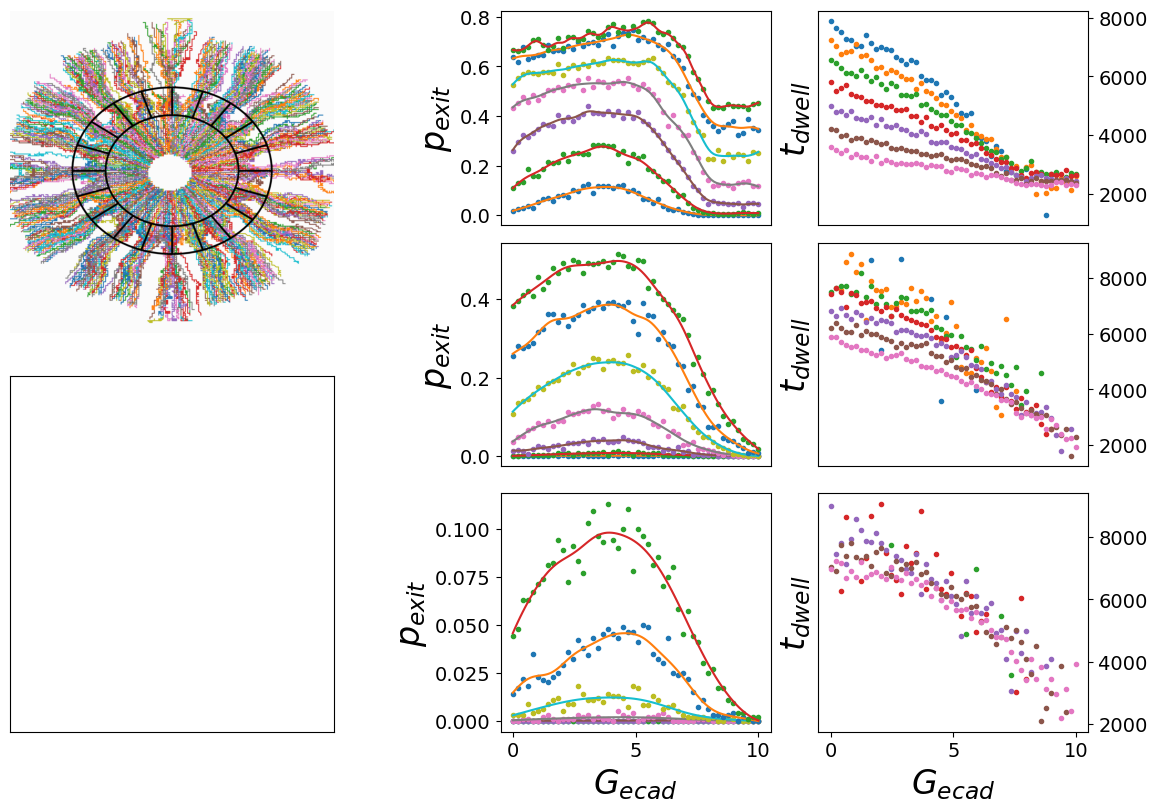

In [146]:
fig2 = plt.figure(constrained_layout=True,figsize=(12,8))
gs = fig2.add_gridspec(12, 18)

ax_1 = fig2.add_subplot(gs[0:6,0:6]) 
ax_1.axis(False)
ax_2 = fig2.add_subplot(gs[6:12,0:6])

remove_axis_ticks([ax_1,ax_2])

ax_3 = fig2.add_subplot(gs[0:4,7:12]) 
ax_4 = fig2.add_subplot(gs[4:8,7:12]) 
ax_5 = fig2.add_subplot(gs[8:12,7:12]) 
ax_3.set_xticks([])
ax_4.set_xticks([])

ax_6 = fig2.add_subplot(gs[0:4,12:17]) 
ax_7 = fig2.add_subplot(gs[4:8,12:17]) 
ax_8 = fig2.add_subplot(gs[8:12,12:17]) 
ax_6.set_xticks([])
ax_7.set_xticks([])
ax_6.yaxis.tick_right()
ax_7.yaxis.tick_right()
ax_8.yaxis.tick_right()



tracks_im = mpimg.imread('GC_TEM_tracks_CC3D.png')
ax_1.imshow(tracks_im)


AXS = [ax_3,ax_4,ax_5]
for i in range(3):
    for j in range(7):
        AXS[i].plot(G_ECadVals,P_Success_lambda[j,i,:],'.')
        AXS[i].plot(G_E,P_Success_lambda_fit[j,i,:],'-')
        
        AXS[i].set_ylabel('$p_{exit}$',fontsize=24)
        #AXS[i].set_yticks([0,0.2,0.4,0.6,0.8])
ax_5.set_xticks([0,5,10])
ax_5.set_xlabel('$G_{ecad}$',fontsize=24)




AXS = [ax_6,ax_7,ax_8]

for i in range(3):
    for j in range(7):
        
        AXS[i].plot(G_ECadVals,DwT_mean[j,i,:],'.')
        
        AXS[i].set_ylabel('$t_{dwell}$',fontsize=24)
        #AXS[i].set_yticks([0,0.2,0.4,0.6,0.8])
ax_8.set_xticks([0,5,10])
ax_8.set_xlabel('$G_{ecad}$',fontsize=24)


#plt.savefig('GC_TEM_Figure_2.png',bbox_inches='tight',dpi=300)